In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [28]:
X=df.values
y = boston_data.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

### Feature importance

There are 13 features are they all important? If not which one has more precidence over other. Let's see.


In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


### Lets check the importances with ADA Boost

In [33]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [34]:
ada.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


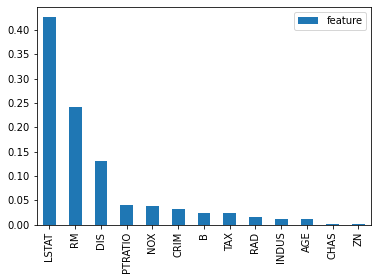

In [37]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

### Now lets see check the importances with Random Forest Regerssor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [41]:
forest.feature_importances_

array([0.03204822, 0.00160483, 0.00700703, 0.00125804, 0.01475089,
       0.40389139, 0.01410918, 0.06287534, 0.00515063, 0.01197446,
       0.01821116, 0.01241787, 0.41470096])

In [42]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.414701
RM,0.403891
DIS,0.062875
CRIM,0.032048
PTRATIO,0.018211
NOX,0.014751
AGE,0.014109
B,0.012418
TAX,0.011974
INDUS,0.007007


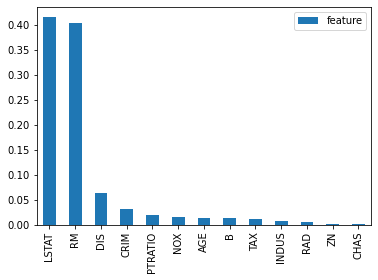

In [43]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

### From DecisionTree Regressor

In [44]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

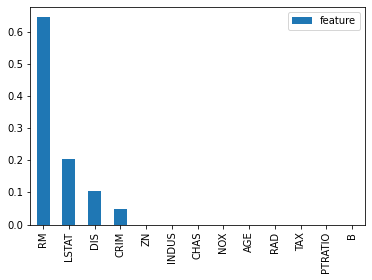

In [45]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

Based on these feature information we can drop the further perform more feature engineering and re-train the model to improve the accuracte and model training time.


## Data Pre-processing

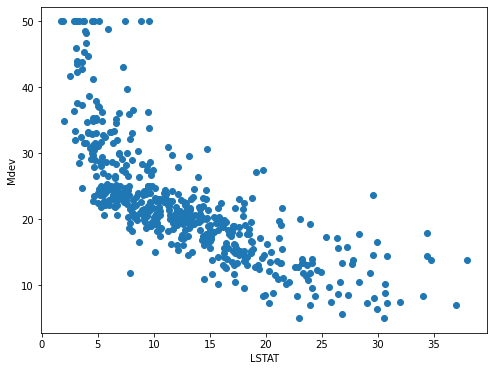

In [63]:
X = df[['LSTAT']].values
y = boston_data.target

def scatterPlot(X,y):
    plt.figure(figsize=(8,6))
    plt.scatter(X,y);
    plt.ylabel('Mdev');
    plt.xlabel('LSTAT')

scatterPlot(X,y)

### Advantage of data pre-processing

The model will return stable predection if the data is preprocessed. We are trying to demonstrate this theory below by ploting the chart which shows the number of error vs number of data. 

In below example the data without preprocessing is performing well for small amount ofsample but when the total sample is more than 100 the modle is very unstable. 

Inversely the modle is very stable with the preprocessed data. 

To prove this we are using the gradient_descent approach. 


Function to plot SSE and Epoch

In [75]:
def gradient_descent(X, y):
    alpha = 0.0001
    X.shape[1]
    w_ = np.zeros(1 + X.shape[1])
    cost_ = []
    n_=100

    for i in range(n_):
        y_pred = np.dot(X, w_[1:]) + w_[0]
        errors = (y - y_pred)
        w_[1:] += alpha * X.T.dot(errors)
        w_[0] += alpha * errors.sum()

        cost = (errors**2).sum() / 2.0
        cost_.append(cost)

    plt.figure(figsize=(8,6))
    plt.plot(range(1, n_ + 1), cost_);
    plt.ylabel('SSE');
    plt.xlabel('Epoch'); 

Before data Pre-Processing

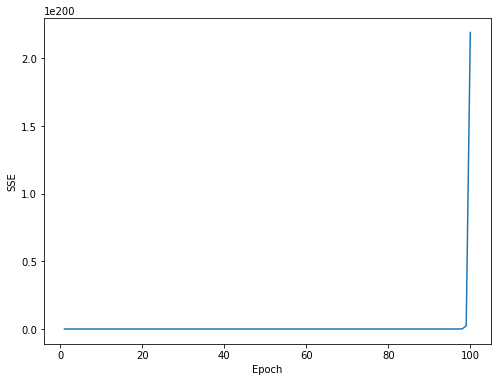

In [76]:
gradient_descent(X,y);

With Pre-Processing

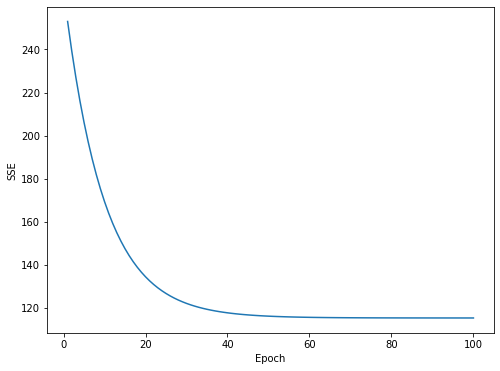

In [68]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

gradient_descent(X_std,y_std);

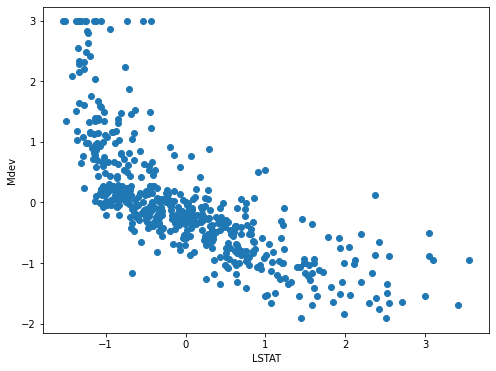

In [64]:
scatterPlot(X_std,y_std)

### Types of Data Pre-processing
- Standardization /Mean Removal
- Min-Max or Scaling Features to a Range
- Normalization
- Binarization
